<a href="https://colab.research.google.com/github/MBABHISHEK/jss-stu-ml-lab-exam/blob/main/10/PCAandLDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PCA

Shape of Data: (150, 4)
Shape of transformed Data: (150, 2)


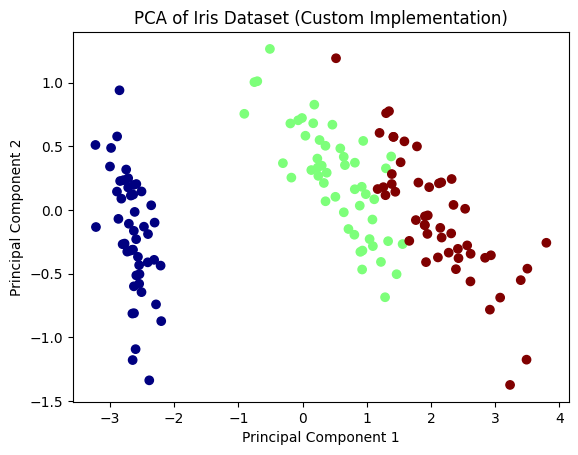

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

class PCA:
    def __init__(self, n_components):
        self.n_components = n_components
        self.components = None
        self.mean = None

    def fit(self, X):
        # Mean center the data
        self.mean = np.mean(X, axis=0)
        X = X - self.mean

        # Calculate covariance matrix
        cov = np.cov(X.T)

        # Calculate eigenvalues and eigenvectors
        eigenvalues, eigenvectors = np.linalg.eig(cov)

        # Sort the vectors in decreasing order of eigenvalues
        eigenvectors = eigenvectors.T
        idxs = np.argsort(eigenvalues)[::-1]
        eigenvalues = eigenvalues[idxs]
        eigenvectors = eigenvectors[idxs]

        # Take required number of components
        self.components = eigenvectors[:self.n_components]

    def transform(self, X):
        X = X - self.mean
        return np.dot(X, self.components.T)

# Load the Iris dataset
X = load_iris().data
y = load_iris().target

# Perform PCA
pca = PCA(n_components=2)
pca.fit(X)
X_projected = pca.transform(X)

print("Shape of Data:", X.shape)
print("Shape of transformed Data:", X_projected.shape)

# Plot the results
pc1 = X_projected[:, 0]
pc2 = X_projected[:, 1]

plt.scatter(pc1, pc2, c=y, cmap="jet")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA of Iris Dataset (Custom Implementation)")
plt.show()

Shape of Data: (150, 4)
Shape of transformed Data: (150, 2)


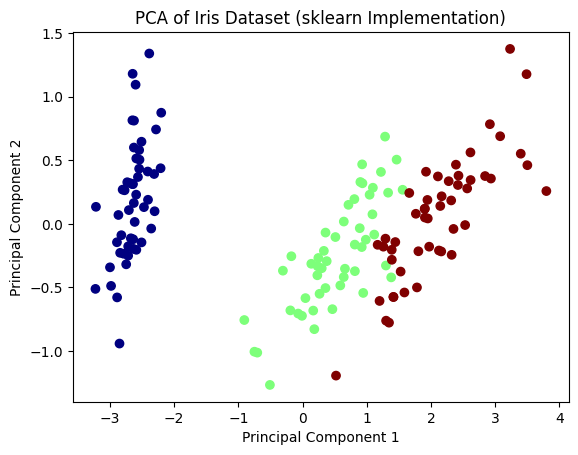

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA as SklearnPCA

# Load the Iris dataset
X = load_iris().data
y = load_iris().target

# Perform PCA using sklearn
pca = SklearnPCA(n_components=2)
X_projected = pca.fit_transform(X)

print("Shape of Data:", X.shape)
print("Shape of transformed Data:", X_projected.shape)

# Plot the results
pc1 = X_projected[:, 0]
pc2 = X_projected[:, 1]

plt.scatter(pc1, pc2, c=y, cmap="jet")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA of Iris Dataset (sklearn Implementation)")
plt.show()

# LDA

Shape of Data: (150, 4)
Shape of transformed Data: (150, 2)


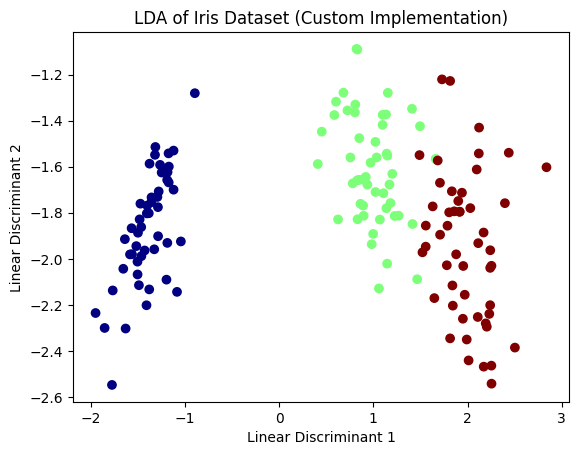

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

class LDA:
    def __init__(self, n_components):
        self.n_components = n_components
        self.linear_discriminants = None

    def fit(self, X, y):
        n_features = X.shape[1]
        class_labels = np.unique(y)

        # Calculate SB and SW
        mean_overall = np.mean(X, axis=0)
        SW = np.zeros((n_features, n_features))
        SB = np.zeros((n_features, n_features))

        for c in class_labels:
            X_c = X[y == c]
            mean_c = np.mean(X_c, axis=0)
            SW += (X_c - mean_c).T.dot((X_c - mean_c))

            n_c = X_c.shape[0]
            mean_diff = (mean_c - mean_overall).reshape(n_features, 1)
            SB += n_c * (mean_diff).dot(mean_diff.T)

        # Determine SW^-1 * SB
        A = np.linalg.inv(SW).dot(SB)

        # Calculate eigenvalues and eigenvectors
        eigenvalues, eigenvectors = np.linalg.eig(A)

        # Sort the vectors in decreasing order of eigenvalues
        eigenvectors = eigenvectors.T
        idxs = np.argsort(eigenvalues)[::-1]
        eigenvalues = eigenvalues[idxs]
        eigenvectors = eigenvectors[idxs]

        # Take required number of components
        self.linear_discriminants = eigenvectors[:self.n_components]

    def transform(self, X):
        return np.dot(X, self.linear_discriminants.T)

# Load the Iris dataset
X = load_iris().data
y = load_iris().target

# Perform LDA
lda = LDA(n_components=2)
lda.fit(X, y)
X_projected = lda.transform(X)

print("Shape of Data:", X.shape)
print("Shape of transformed Data:", X_projected.shape)

# Plot the results
ld1 = X_projected[:, 0]
ld2 = X_projected[:, 1]

plt.scatter(ld1, ld2, c=y, cmap="jet")
plt.xlabel("Linear Discriminant 1")
plt.ylabel("Linear Discriminant 2")
plt.title("LDA of Iris Dataset (Custom Implementation)")
plt.show()

Shape of Data: (150, 4)
Shape of transformed Data: (150, 2)


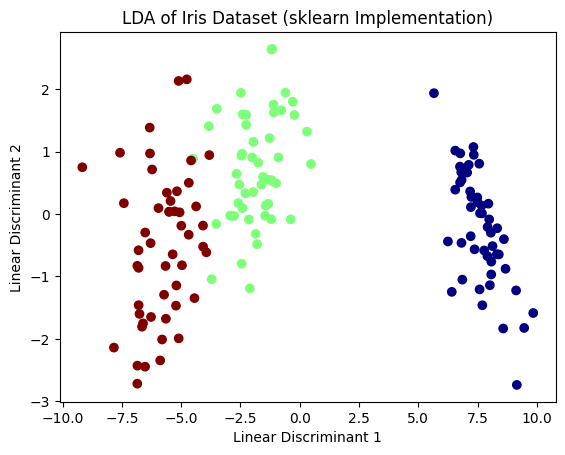

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Load the Iris dataset
X = load_iris().data
y = load_iris().target

# Perform LDA using sklearn
lda = LinearDiscriminantAnalysis(n_components=2)
X_projected = lda.fit_transform(X, y)

print("Shape of Data:", X.shape)
print("Shape of transformed Data:", X_projected.shape)

# Plot the results
ld1 = X_projected[:, 0]
ld2 = X_projected[:, 1]

plt.scatter(ld1, ld2, c=y, cmap="jet")
plt.xlabel("Linear Discriminant 1")
plt.ylabel("Linear Discriminant 2")
plt.title("LDA of Iris Dataset (sklearn Implementation)")
plt.show()